<a href="https://colab.research.google.com/github/Lucress/Fraudulent_Wines/blob/main/Fraudulent_Wines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fraud in the wine sector**

Wine fraud concerns the commercial aspects of wine. The most common type of fraud is where wines are adulterated, usually by the addition of cheaper products (eg juices) and sometimes harmful chemicals and sweeteners (to compensate for color or flavor).

Another common type of fraud is counterfeiting and relabeling lower quality, cheaper wines for more expensive brands.

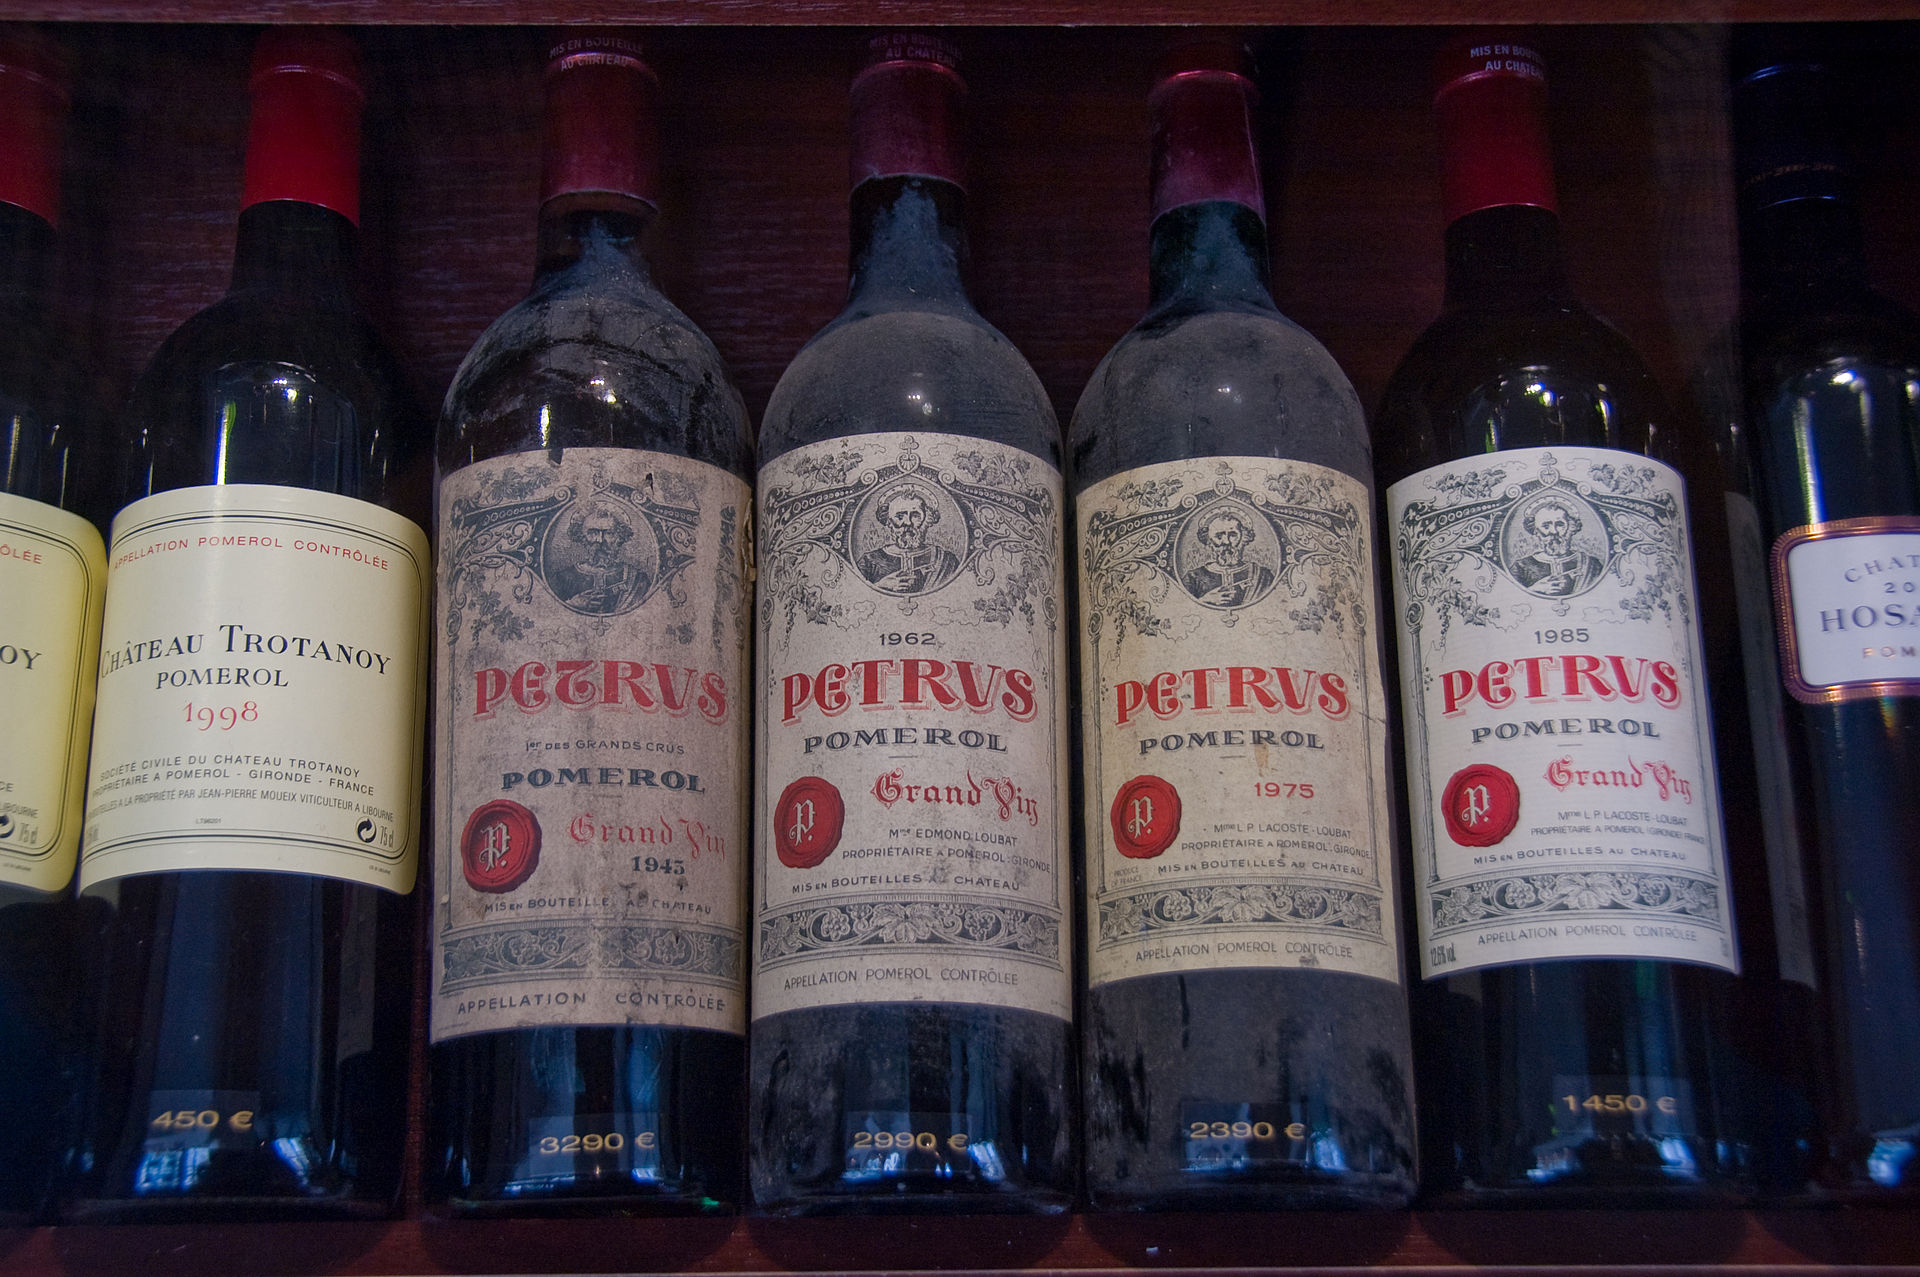

**The project's objectives**
A distribution company that was recently defrauded conducted an audit of various wine samples using chemical analysis on samples. The distribution company specializes in exporting expensive, very high-quality wines, but was defrauded by a supplier who was trying to pass off cheap, low-quality wines as premium wines. The distribution company has hired you to try to create a machine learning model that can help detect poor quality wine samples (aka "fraud"). She wants to know if it is even possible to detect such a difference.

Data source: P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

# **Data exploration and vuisualization**

In [2]:
df = pd.read_csv('wine_fraud.csv')
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol quality type  
0      9.4   Legit  red  
1      9.8   Legit  red  
2      9.8   Legit  red  
3      9.8   Legit  red  
4      9.4   Legit  red

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   object 
 12  type                  6497 non-null   object 
dtypes: float64(11), object(2)
memory usage: 660.0+ KB


In [4]:
df['quality'].unique()

array(['Legit', 'Fraud'], dtype=object)

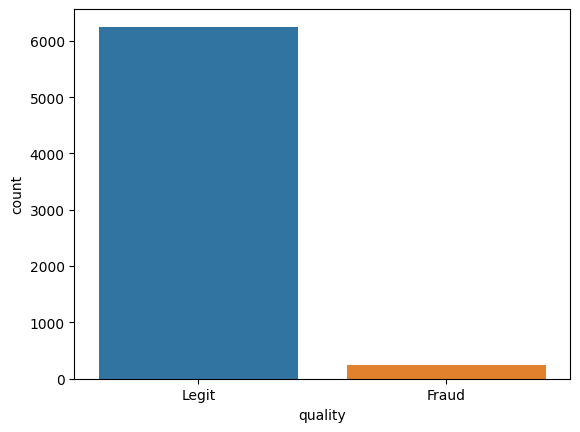

In [6]:
sns.countplot(data=df, x='quality');

We can clearly remark here that the classes are not balanced

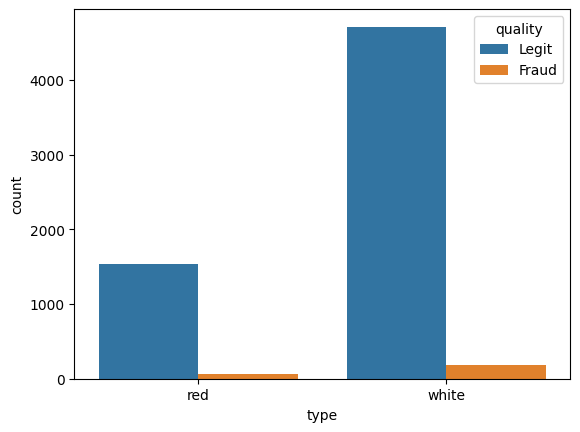

In [8]:
sns.countplot(data=df, x='type' , hue='quality');

In [10]:
red_wines = df[df["type"]=='red']
white_wines = df[df["type"]=='white']
print("Percent of fraud in red wines :")
print(100* (len(red_wines[red_wines['quality']=='Fraud'])/len(red_wines)))
print("Percent of fraud in white wines :")
print(100* (len(white_wines[white_wines['quality']=='Fraud'])/len(white_wines)))

Percent of fraud in red wines :
3.9399624765478425
Percent of fraud in white wines :
3.7362188648427925


Let's see corralation between all those features

In [11]:
df['Fraud']= df['quality'].map({'Legit':0,'Fraud':1})
df.corr()['Fraud']

fixed acidity           0.021794
volatile acidity        0.151228
citric acid            -0.061789
residual sugar         -0.048756
chlorides               0.034499
free sulfur dioxide    -0.085204
total sulfur dioxide   -0.035252
density                 0.016351
pH                      0.020107
sulphates              -0.034046
alcohol                -0.051141
Fraud                   1.000000
Name: Fraud, dtype: float64

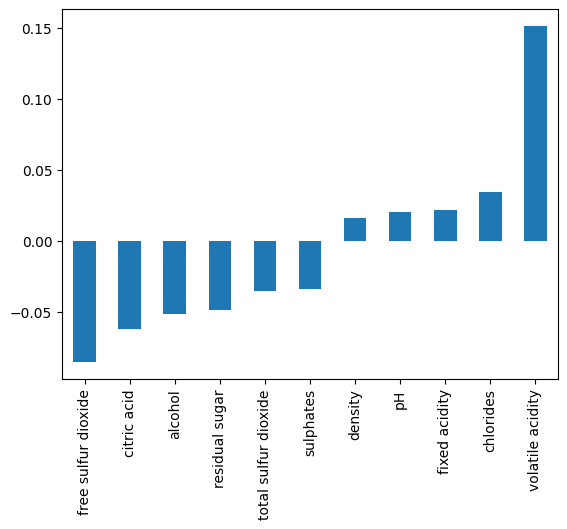

In [12]:
df.corr()['Fraud'][:-1].sort_values().plot(kind='bar');

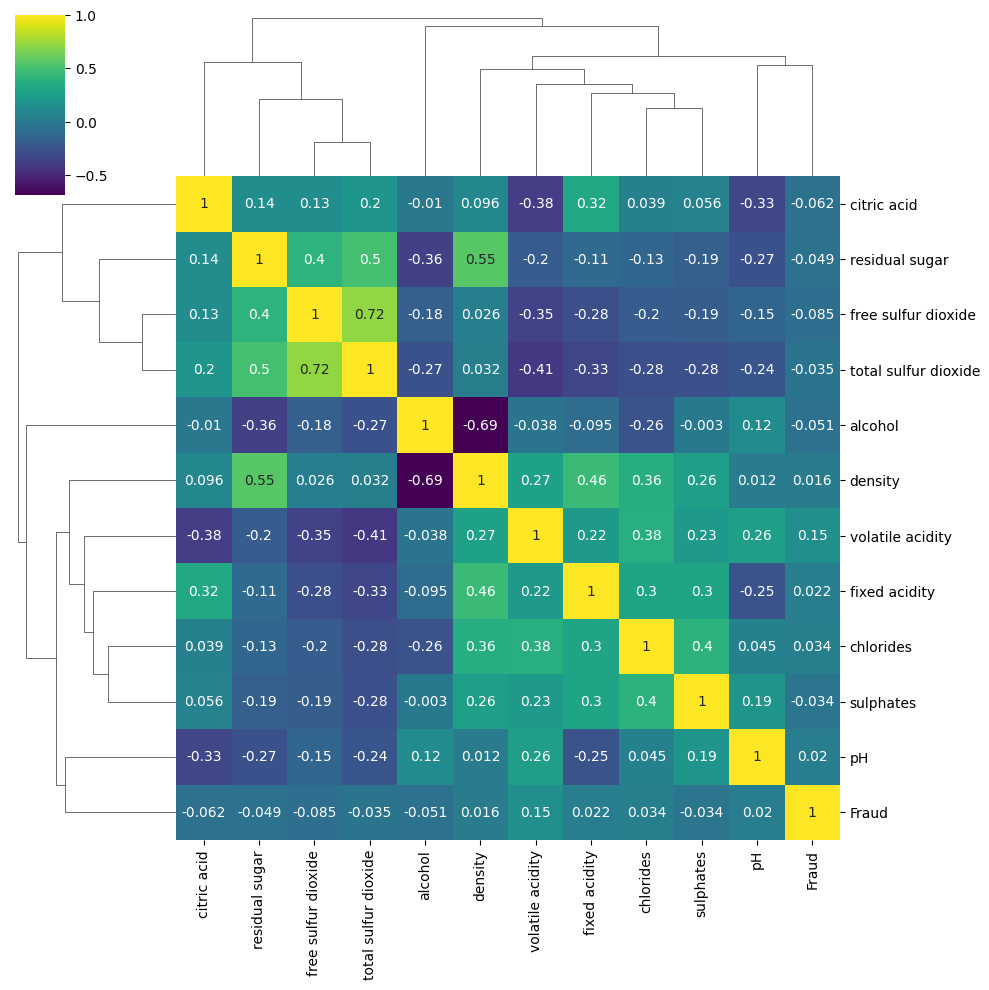

In [14]:
sns.clustermap(df.corr(),cmap='viridis', annot=True);

# **Model Training**

In [15]:
df['type'] = pd.get_dummies(df['type'],drop_first=True)
df = df.drop('Fraud',axis=1)

In [16]:
X = df.drop('quality',axis=1)
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [18]:
svc = SVC(class_weight='balanced')
param_grid = {'C':[0.001,0.01,0.1,0.5,1],'gamma':['scale','auto']}
grid_model = GridSearchCV(svc,param_grid)
grid_model.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1],
                         'gamma': ['scale', 'auto']})

In [27]:
grid_model.best_params_

{'C': 1, 'gamma': 'auto'}

# **Model Evaluation**

In [31]:
y_pred= grid_model.predict(scaled_X_test)
confusion_matrix(y_test,y_pred)

array([[ 17,  10],
       [ 92, 531]])

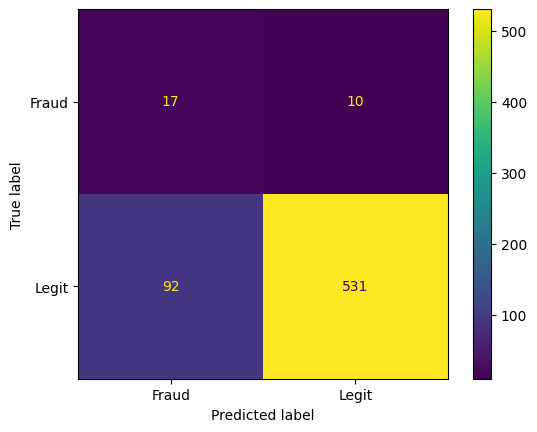

In [35]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

The model seems to not predict really well. The model is able to detect legit wine that fraudulent and that  it not the objective of our study.
We want a model that is more likely to determine fraudulent wine.

Let's have a look at the classification report to confirm or not this hypothesis

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       Fraud       0.16      0.63      0.25        27
       Legit       0.98      0.85      0.91       623

    accuracy                           0.84       650
   macro avg       0.57      0.74      0.58       650
weighted avg       0.95      0.84      0.88       650



# **Conclusion**

We can conclude that the chemical analysis of wines to determine if a wine is fraudulent or not, it not really the best way to solved this problem.Because the chemical composants of a wine are not really differiential elements.

May be, we should focus on other features to solve this problem such as label analysis, where the wine was purchased,....